<a href="https://www.kaggle.com/code/durjoychandrapaul/edge-detection-transformation-image-processing?scriptVersionId=209854402" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Introduction 
Author: [Durjoy Chandra Paul](https://www.linkedin.com/in/durjoy-chandra-paul/)

This notebook explores various image transformations for enhancing visual features and edge detection. It covers linear transformations (negative, identity), logarithmic transformations (log, inverse-log), and power-law transformations (nth power, nth root). Additionally, edge detection techniques like Sobel, Prewitt, and Roberts operators are applied to identify image boundaries. These methods are essential for preprocessing and feature extraction in image analysis.

In [1]:


import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

## Transformations
Three basic types of transformations : 

* Linear (negative and identity transformations)
* Logarithmic (log and inverse-log transformations)
* Power-law (nth power and nth root transformations)


In [2]:
def show_image(image):
    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show

def convert_gray(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

### Negative 
The negative of an image with intensity levels in the
range [0,L-1] can be described by:

s = (L −1)− r

s = 255 - r

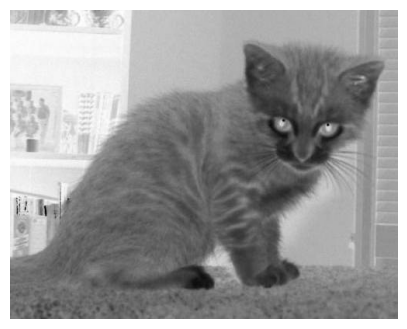

In [3]:

img = cv2.imread('/kaggle/input/cat-and-dog-finder/test_set/test_set/cats/cat.4003.jpg', 0)  # Read image in grayscale
negative_img = 255 - img  # Invert pixel values

show_image(negative_img)


### Logarithmic Transformation 
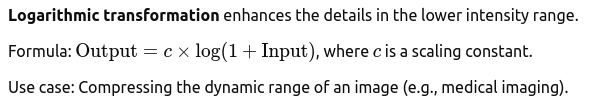

/tmp/ipykernel_17/1518319905.py:2: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(1 + img))
/tmp/ipykernel_17/1518319905.py:4: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype='uint8')


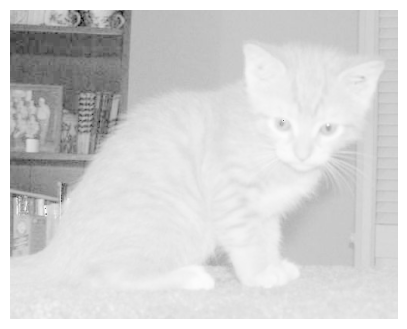

In [4]:

c = 255 / np.log(1 + np.max(img))
log_image = c * (np.log(1 + img))

log_image = np.array(log_image, dtype='uint8')

show_image(log_image)

### Gamma Correction (Power-Law Transformation)
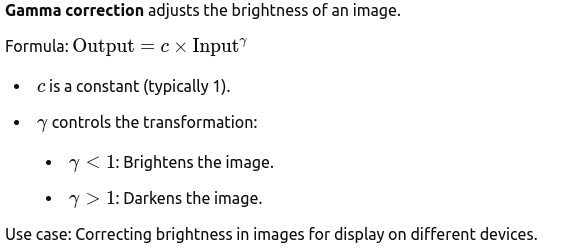

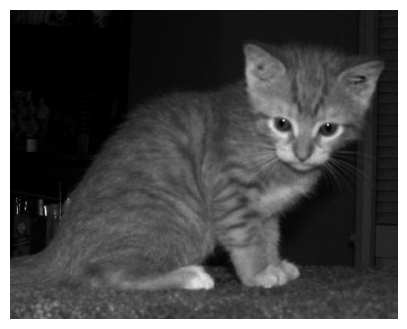

In [5]:
gamma = 2.2
gamma_corrected = np.array(255 * (img / 255) ** gamma, dtype='uint8')
show_image(gamma_corrected)


## Common Edge Detector 
* Sobel
* Prewitt
* Roberts

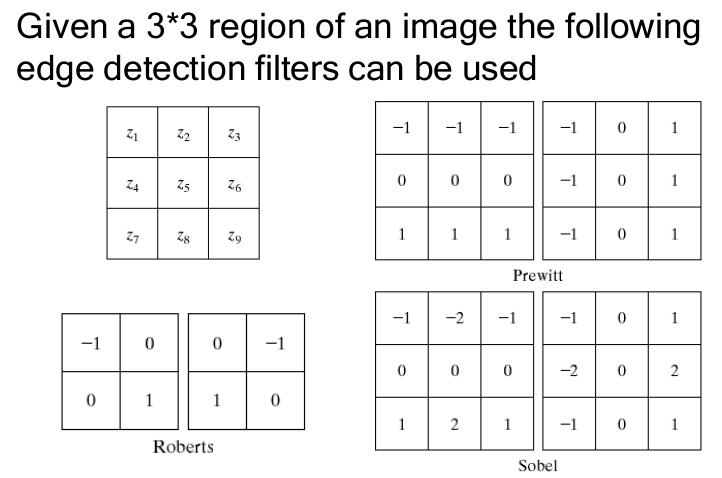

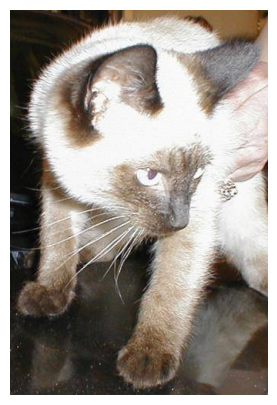

In [6]:
image_path ='/kaggle/input/cat-and-dog-finder/test_set/test_set/cats/cat.4009.jpg'
image =cv2.imread(image_path)
show_image(image)


In [7]:
gray_image= convert_gray(image)
gray_image

array([[23, 23, 23, ..., 55, 52, 61],
       [22, 22, 22, ..., 47, 47, 51],
       [20, 21, 21, ..., 38, 40, 38],
       ...,
       [57, 55, 65, ..., 69, 79, 86],
       [58, 54, 71, ..., 73, 86, 94],
       [55, 47, 67, ..., 74, 88, 97]], dtype=uint8)

In [8]:
img_gaussian = cv2.GaussianBlur(gray_image,(3,3),0)

### Sobel 

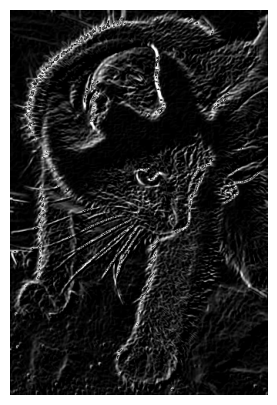

In [9]:
#sobel 
kernelx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
kernely = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
show_image(img_prewittx + img_prewitty)

### Prewitt

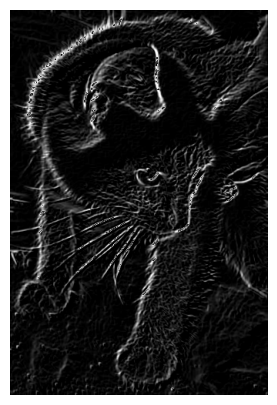

In [10]:
kernelx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
show_image(img_prewittx + img_prewitty)

### Robert

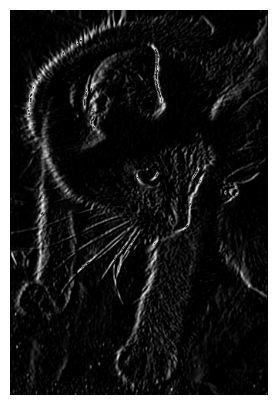

In [11]:
kernelx=np.array([[-1,0],[0,1]])
kenely=np.array([[0,-1],[1,0]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
show_image(img_prewittx+img_prewitty)